In [24]:
# load libs
from tensorflow.keras.models import model_from_json
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# load model
model_class_filename = './_models/emotion_classification/model.json'
weights_filename = './_models/emotion_classification/saved_weights'

# read json and create model
with open(model_class_filename, 'r') as json_file:
    loaded_model_class_json = json_file.read()
model_class = model_from_json(loaded_model_class_json)

# load weights into new model
model_class.load_weights(weights_filename)

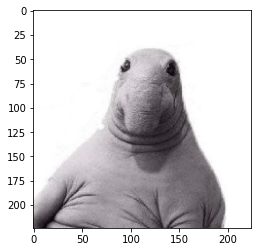

In [23]:
# load face for prediction
img = cv2.imread('./test_foto/waiter.jpg')[0:600, 200:800]
img = cv2.resize(img, (224, 224))
plt.imshow(img)

In [27]:
# making prediction
num_emotion = np.argmax(model_class(np.expand_dims(img, 0)))
emotions = ['Anger', 'Contempt',
                    'Disgust', 'Fear',
                    'Happy', 'Neutral',
                    'Sad', 'Surprise', 'Uncertain']
emotion = emotions[num_emotion]

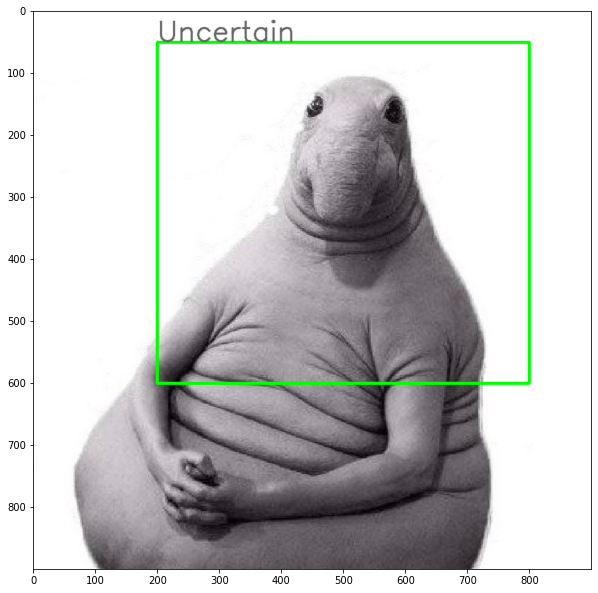

In [49]:
# output img:
# base:
img = cv2.imread('./test_foto/waiter.jpg')

# rectangle
cv2.rectangle(img, (200, 50), (800, 600), (0, 255, 0), thickness=3)

# settings
label_org=(200, 48)
font_name = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1.5
font_thickness = 2
font_line_type = cv2.LINE_AA
font_color = (100, 100, 100)
    
# caption
cv2.putText(img,
            text=emotion,
            org=label_org,
            fontFace=font_name,
            fontScale=font_scale,
            color=font_color,
            thickness=font_thickness,
            lineType=font_line_type)
plt.figure(figsize=(10, 20))
output = plt.imshow(img)
output